<a href="https://colab.research.google.com/github/RewinaB/peopleanalytics-regression-book/blob/master/Multinomial_logistic_regression_Benefits_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

  The company recently introduced a new health insurance provider for its employees. At the beginning of the year the employees had to choose one of three different health plan products from this provider to best suit their needs. You have been asked to determine which factors influenced the choice in product.
---

# Multinomial Logistic Regression

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
sns.set()  #if you want to use seaborn themes with matplotlib functions
import warnings
warnings.filterwarnings('ignore')

In [24]:
rand_state= 1000

In [25]:
df = pd.read_csv('http://peopleanalytics-regression-book.org/data/health_insurance.csv')

In [26]:
df.head()

,product,age,household,position_level,gender,absent
0,C,57,2,2,Male,10
1,A,21,7,2,Male,7
2,C,66,7,2,Male,1
3,A,36,4,2,Female,6
4,A,23,0,2,Male,11


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   product         1453 non-null   int64
 1   age             1453 non-null   int64
 2   household       1453 non-null   int64
 3   position_level  1453 non-null   int64
 4   gender          1453 non-null   int64
 5   absent          1453 non-null   int64
dtypes: int64(6)
memory usage: 68.2 KB


In [28]:
import pandas as pd


# Convert 'product' column to a factor (categorical)
df['product'] = df['product'].astype('category')
df['gender'] = df['gender'].astype('category')



In [29]:
# first we look at target variable proportions:
import pandas as pd

# Assuming your dataframe is named 'df' and the target variable is 'product'
# Calculate proportions of the target variable
proportions = pd.crosstab(index=df['product'], columns='count', normalize=True) * 100

print(proportions)


col_0        count
product           
A        34.067447
B        31.589814
C        34.342739


If the target variable is highly imbalanced, there areimplication for performance metrics like accuracy. F1 score, percison and recall are better metrics.



## Data preprocessing

In [30]:
df.isna().sum()

product           0
age               0
household         0
position_level    0
gender            0
absent            0
dtype: int64

In [31]:
df.describe()

,age,household,position_level,absent
count,1453.000000,1453.000000,1453.000000,1453.000000
mean,40.918789,3.257398,2.900206,14.466621
std,13.530356,2.231402,1.216431,8.114098
min,21.000000,0.000000,1.000000,0.000000
25%,30.000000,2.000000,2.000000,8.000000
50%,37.000000,3.000000,3.000000,15.000000
75%,53.000000,5.000000,4.000000,21.000000
max,67.000000,7.000000,5.000000,31.000000


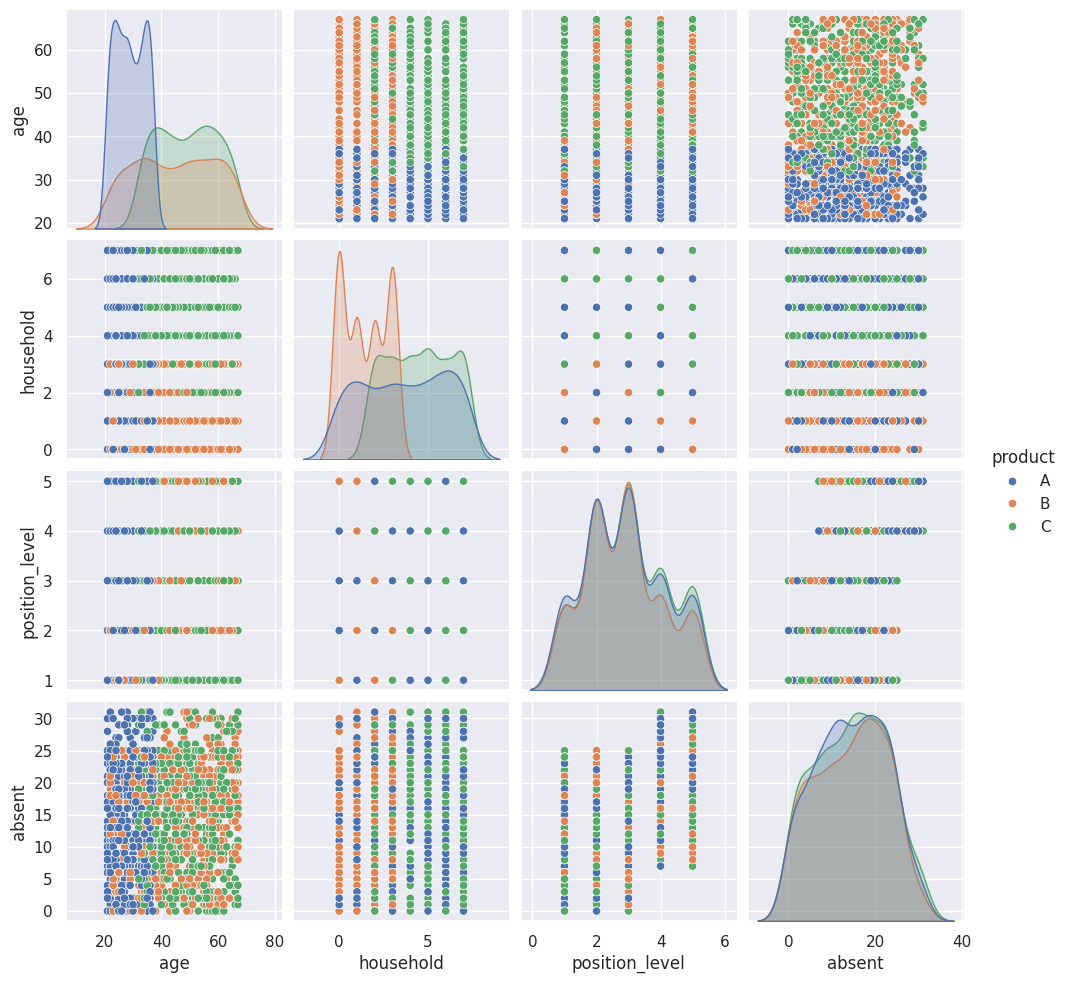

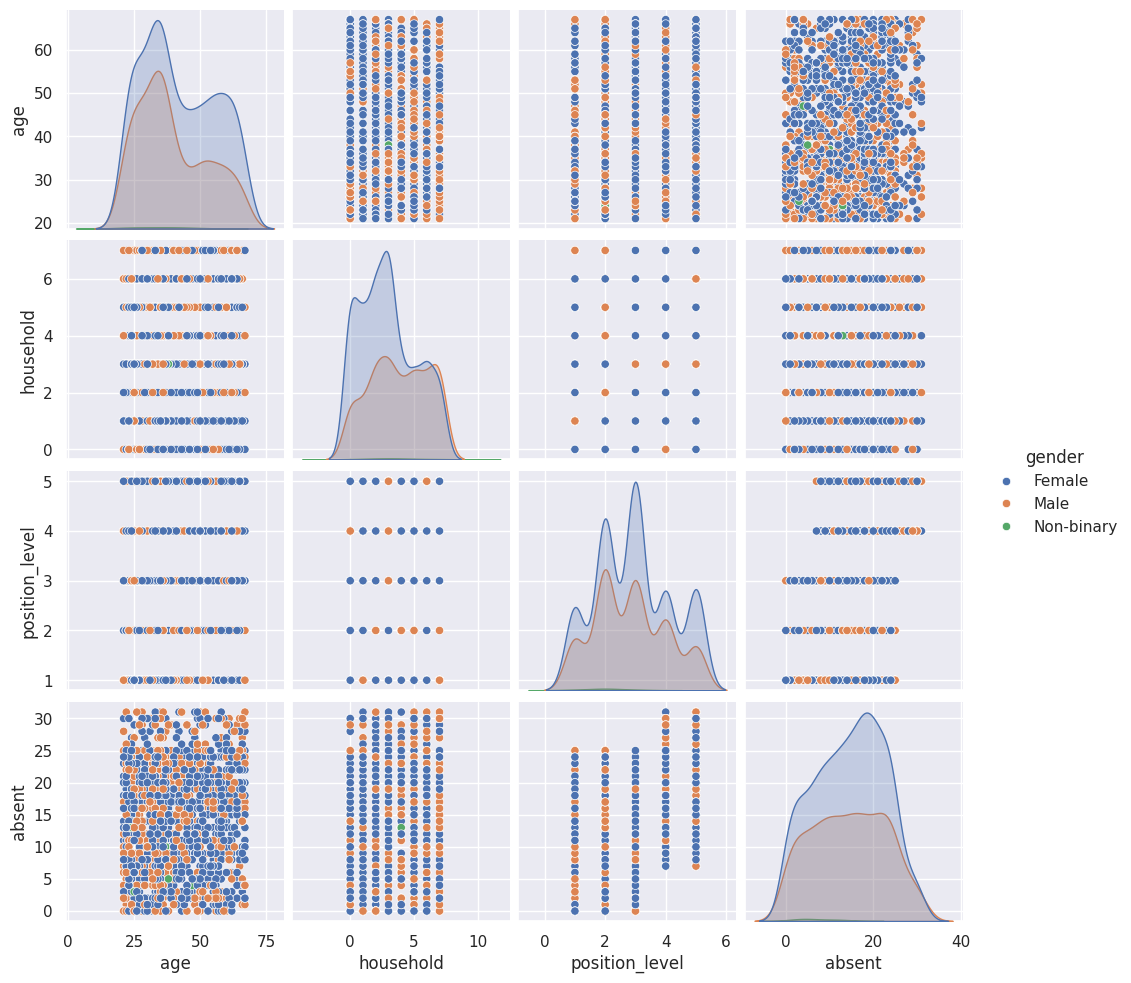

In [32]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your pandas DataFrame with two categorical variables

# Use Seaborn's pairplot function and specify the 'hue' parameter for each categorical variable
sns.pairplot(df, hue='product')# hue_order= ['category1', 'category2', 'category3']) # For the first categorical variable
sns.pairplot(df, hue='gender') # For the second categorical variable
plt.show()



Using the statsmodel.api, let’s take our simple case of regressing the promoted outcome against sales. We use a standard binomial GLM function and our standard formula notation




In [33]:
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder

# Encode categorical variables
label_encoder = LabelEncoder()
df['product'] = label_encoder.fit_transform(df['product'])
df['gender'] = label_encoder.fit_transform(df['gender'])

# Define independent variables (X) and dependent variable (y)
X = df[['age', 'gender', 'household', 'position_level', 'absent']]
y = df['product']

# Fit multinomial logistic regression model
multi_model = sm.MNLogit(y, sm.add_constant(X))
multi_result = multi_model.fit()

# Print summary
print(multi_result.summary())




Optimization terminated successfully.
         Current function value: 0.517781
         Iterations 8
                          MNLogit Regression Results                          
Dep. Variable:                product   No. Observations:                 1453
Model:                        MNLogit   Df Residuals:                     1441
Method:                           MLE   Df Model:                           10
Date:                Fri, 23 Feb 2024   Pseudo R-squ.:                  0.5284
Time:                        02:42:27   Log-Likelihood:                -752.34
converged:                       True   LL-Null:                       -1595.3
Covariance Type:            nonrobust   LLR p-value:                     0.000
     product=1       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -4.5728      0.508     -9.001      0.000      -5.568      -3.577
age              

We see that all variables except absent seem to play a significant role in the choice of Product A. All else being equal, being older makes the choice of Product A less likely. Males are more likely to choose Product A, and larger households and higher position levels also make the choice of Product A more likely. Based on this, we can consider simplifying our model to remove absent.

In [36]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder

# Encode categorical variables
label_encoder = LabelEncoder()
df['gender'] = label_encoder.fit_transform(df['gender'])

# Define independent variables (X) and dependent variable (y)
X = df[['age', 'household', 'gender', 'position_level']]
y = df['product']  # Assuming 'product' is categorical with multiple classes

# Fit multinomial logistic regression model
multi_model = sm.MNLogit(y, sm.add_constant(X))
multi_result = multi_model.fit()

# Calculate odds ratios
odds_ratios = np.exp(multi_result.params)

# Create DataFrame to display odds ratios
odds_ratios_df = pd.DataFrame(odds_ratios, columns=multi_result.params.columns)

# Print DataFrame
print(odds_ratios_df)




Optimization terminated successfully.
         Current function value: 0.518001
         Iterations 8
                       0         1
const           0.011245  0.000038
age             1.273239  1.308619
household       0.387894  1.228693
gender          0.107183  1.100809
position_level  0.675207  0.810523


### Defining variables and splitting the data

# This is multivariate multinomial logistic regression

In [44]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder


# Encode categorical variables
label_encoder = LabelEncoder()
df['gender'] = label_encoder.fit_transform(df['gender'])
df['position_level'] = label_encoder.fit_transform(df['position_level'])

# Define independent variables (X) and dependent variable (y)
X = df[['age', 'gender', 'household', 'position_level']]
y = df['product']  # Assuming 'product' is categorical with multiple classes

# Fit multinomial logistic regression model
multi_model = sm.MNLogit(y, sm.add_constant(X))
multi_result = multi_model.fit()

# Calculate odds ratios
odds_ratios = np.exp(multi_result.params)

# Create DataFrame to display odds ratios
odds_ratios_df = pd.DataFrame(odds_ratios, columns=multi_result.params.columns)

# Print DataFrame
print(odds_ratios_df)




         Current function value: -0.000000
         Iterations: 35
                           0             1
const           2.772335e-14  2.772335e-14
age             1.152648e+00  1.152648e+00
gender          4.370357e+00  4.370357e+00
household       1.583731e+00  1.583731e+00
position_level  1.683847e+00  1.683847e+00
